## Q1: Vector Shapes

In [ ]:
!pip install mapclassify #helper package
#import required packages
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString, MultiLineString
from shapely.geometry import Polygon, MultiPolygon
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 1.9 MB/s eta 0:00:00


### Q1a

**Your Text Answer**
*   Points: There are 5 points indication different subway stations.
*   LineStrings: There are 4 LineStrings for each subway line.
*   Polygons: There is 1 polygon outlining Downtown Toronto.


### Q1b

In [ ]:
## DO NOT MODIFY THE CODE BELOW ##
# list of Points objects in the map
locations = [Point(40,80), Point(55,80), Point(55,70),Point(47.5,65)]

# list of LineString objects in the map
lines = [LineString([Point(55,90), Point(55, 70), Point(47.5,65), Point(40, 70), Point(40,90)]),
        LineString([Point(55,80),Point(65,80)]),
        LineString([Point(30,70), Point(65,70)])]

## END OF DO NOT MODIFY ##

# The Point object in map that is missing in the above list
missing_location = [Point(40,70)] ## YOU CODE GOES HERE ##

## DO NOT MODIFY THE CODE BELOW ##
# The LineString object in map that is missing in the above list
missing_line = [LineString([Point(30,65), Point(65, 65)])]
## END OF DO NOT MODIFY ##

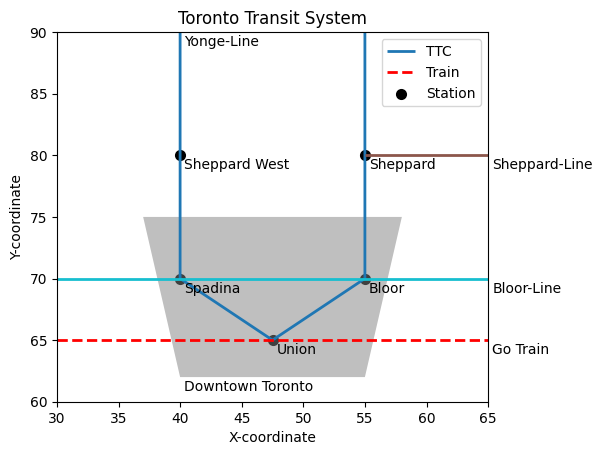

In [ ]:
# run the following code to plot the map
## DO NOT MODIFY THE FOLLOWING CODE ##
locations = [Point(40,80)] + missing_location + [Point(55,80), Point(55,70),Point(47.5,65)]
lines = [lines[0]] + missing_line + [lines[1], lines[2]]
locations_name = ['Sheppard West', 'Spadina', 'Sheppard','Bloor', 'Union']
# List of location properties
location_properties = ['Station' for i in range(len(locations))]
# List of line names
lines_name = ['Yonge-Line', 'Go Train', 'Sheppard-Line', 'Bloor-Line']
# List of line properties
line_properties = ['TTC', 'Train', 'TTC', 'TTC']
# Ploygon
polygon = [Polygon([Point(40,62), Point(55, 62), Point(58,75),Point(37, 75)])]
polygon_name = ['Downtown Toronto']
polygon_properties = ['Area']
# Create a GeoDataFrame
gdf = gpd.GeoDataFrame({'name': lines_name  + locations_name + polygon_name,
                       'properties': line_properties + location_properties + polygon_properties,
                       'geometry': lines + locations + polygon})
def plot_from_gdf(gdf) -> None:
    # given a GeoDataFrame, plot the geometries with different colors based on their properties
    # and annotate the name of the geometries
    for prop, color, linestyle, alpha in [('TTC', 'tab10', '-', 1), ('Train', 'red', '--', 1),
                                          ('Station', 'black', '-', 1), ('Area', 'grey', '-', 0.5)]:
        try:
            gdf[gdf['properties'] == prop].plot(color=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())
        except:
            gdf[gdf['properties'] == prop].plot(cmap=color, lw=2, ls=linestyle, alpha=alpha, ax=plt.gca())

    switch = {
        Point: lambda s: (s.x, s.y),
        # if the shape is a polygon, annotate at the last point
        LineString: lambda s: (s.xy[0][-1], s.xy[1][-1]),
        # if the shape is a polygon, annotate at the first point
        Polygon: lambda s: (s.exterior.coords.xy[0][0], s.exterior.coords.xy[1][0])
        }

    for shape, label in zip(gdf.geometry, gdf.name):
        xy = switch.get(type(shape))(shape)
        if xy:
            plt.annotate(label, xy=xy, xytext=(3, -10), textcoords="offset points")

    plt.xlim(gdf.total_bounds[0], gdf.total_bounds[2])
    plt.ylim(60,90)
    plt.legend(['TTC', 'Train', 'Station'])
    plt.title('Toronto Transit System')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.show()

plot_from_gdf(gdf)

### Q1c

part 1

In [ ]:
### YOUR CODE HERE ###
#create a function to find points specifically in downtown toronto
def find_station_downtown(gdf, area) -> None:
  #geometry of the area
  if isinstance(area, Polygon):
    geom_area = area
  else:
    geom_area = gdf[gdf['name'] == area].geometry.values[0]

  for _, row in gdf.iterrows():
    if geom_area.contains(row.geometry) and row['properties'] == 'Station':
      print(row['name'], 'is within', area)

#calling function
find_station_downtown(gdf, 'Downtown Toronto')

Spadina is within Downtown Toronto
Bloor is within Downtown Toronto
Union is within Downtown Toronto


part 2

In [ ]:
user_location = [Point(40,80), Point(40, 70), Point(55,80), Point(55,70),Point(47.5,65)]
### YOUR CODE HERE ###
downtown = gdf[gdf['name'] == 'Downtown Toronto'].geometry.values[0]
for location in user_location:
  if downtown.contains(location):
    print(f'{location} is within Downtown Toronto')
  else:
    print(f'{location} is not within Downtown Toronto')



POINT (40 80) is not within Downtown Toronto
POINT (40 70) is within Downtown Toronto
POINT (55 80) is not within Downtown Toronto
POINT (55 70) is within Downtown Toronto
POINT (47.5 65) is within Downtown Toronto


## Q2: CRS and ShapeFiles

### Q2a

In [ ]:
### DO NOT CHANGE THE FOLLOWING CODE ###
#download the Shapefile
#If you encounter a very long runtime, please check if 'replace /content/...... [y]es, [n]0 .....' is displayed in the output
#If so, it means the file already exists in the directory. Please completely restart the colab runtime (google it if you do not know how) and run the code again
!wget https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
!os.mkdir('/content/cb_2018_us_state_500k')
!unzip cb_2018_us_state_500k.zip -d /content/cb_2018_us_state_500k

--2025-03-23 23:07:18--  https://github.com/MIE223-2024/course-datasets/raw/main/cb_2018_us_state_500k.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip [following]
--2025-03-23 23:07:19--  https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/cb_2018_us_state_500k.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3304931 (3.2M) [application/zip]
Saving to: ‘cb_2018_us_state_500k.zip’

cb_2018_us_state_50 100%[===================>]   3.15M  --.-KB/s    in 0.09s   

2025-03-23 23:07:19 (34.3 MB/s) - ‘cb_2018_us_state_500k

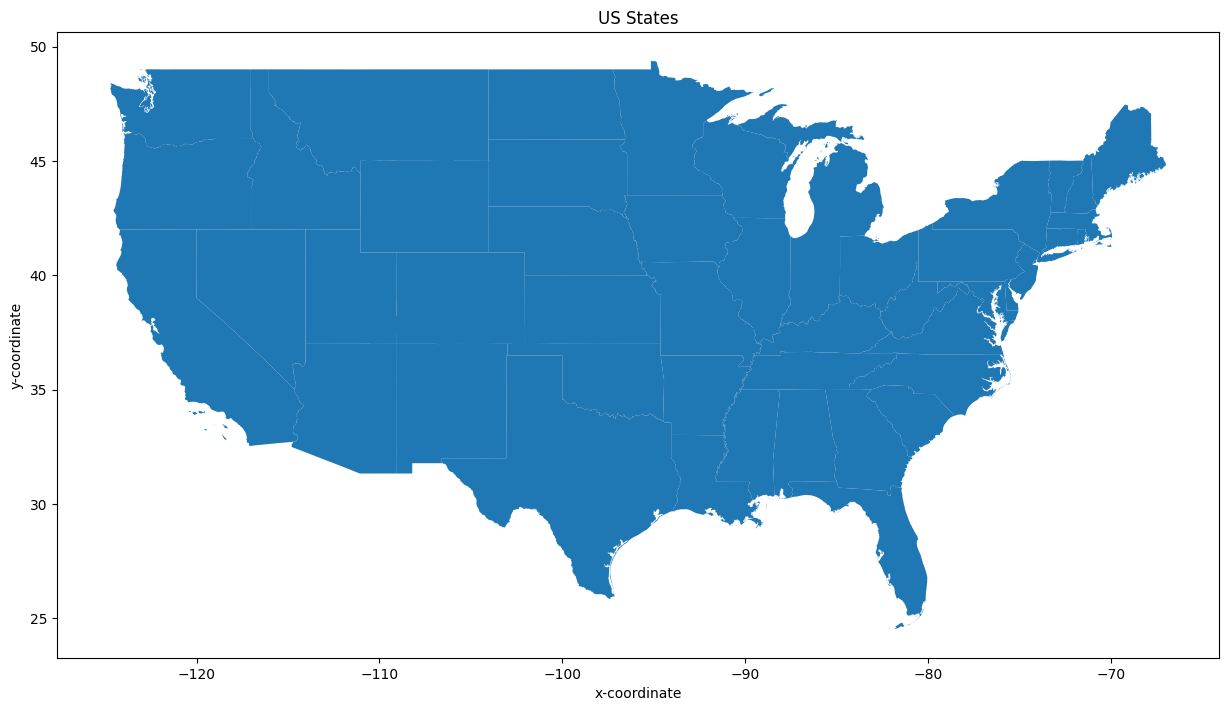

EPSG:4269


In [ ]:
shape_file_location = 'cb_2018_us_state_500k' # location of the shapefile
### YOUR CODE HERE ###
gdf_states = gpd.read_file(shape_file_location) # read the shapefile as a GeoDataFrame as gdf_states

### DO NOT CHANGE THE FOLLOWING CODE ###
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]


### YOUR CODE HERE ###
# plot the map
gdf_states.plot(figsize=(15,15)) #dimensions
plt.title('US States')
plt.xlabel('x-coordinate')
plt.ylabel('y-coordinate')
plt.show()
# check CRS
print(gdf_states.crs)


**Your Text Answer:**

### Q2b

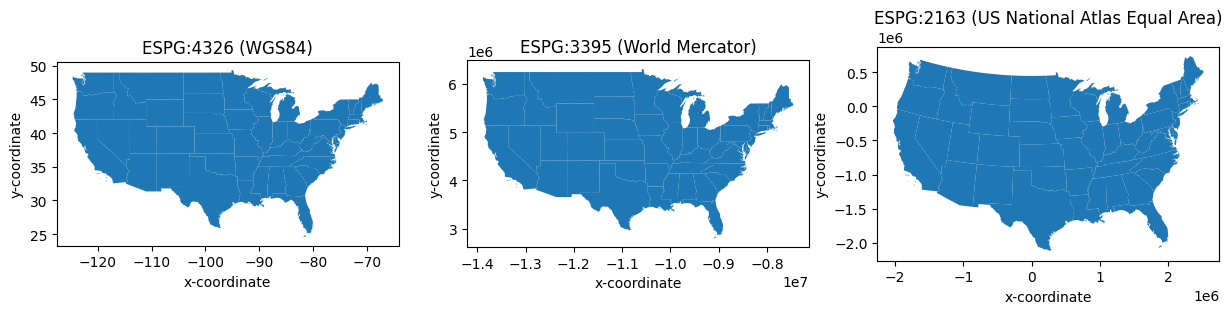

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 10))
ax.flatten()

### YOUR CODE HERE ###
crs_options = [
    ("ESPG:4326 (WGS84)", gdf_states.to_crs(epsg=4326)),
    ("ESPG:3395 (World Mercator)", gdf_states.to_crs(epsg=3395)),
    ("ESPG:2163 (US National Atlas Equal Area)", gdf_states.to_crs(epsg=2163))
]

#plot each crs
for i, (title,gdf) in enumerate(crs_options):
  gdf.plot(ax=ax[i])
  ax[i].set_title(title)
  ax[i].set_xlabel('x-coordinate')
  ax[i].set_ylabel('y-coordinate')

plt.show()

**Your Text Answer** ESPG:2163 was chosen because it is an equal area projection of the features on the map, ensuring that data is accurately represented based on area.

### Q2c

In [ ]:
### YOUR CODE HERE ###
#get the number of vector shapes and print
num_vector_shapes = len(gdf_states)
print(f'There are {num_vector_shapes} vector shapes.')
#examine the fifth row
fifth_row = gdf_states.geometry[4]
print("The Type of Shape: ", fifth_row.geom_type)
print("Number of points: ", len(fifth_row.exterior.xy[0]))
print("Area: ", fifth_row.area)

There are 49 vector shapes.
The Type of Shape:  Polygon
Number of points:  3880
Area:  6.493879726220489


## Question 3: Choropleth By Popuplation

In [ ]:
### DO NOT MODIFY THE FOLLOWING CODE ###
# download the data and prepare the data
death_by_state = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
death_by_state = death_by_state.drop(columns = ['UID', 'iso2', 'iso3', 'code3',
                                                      'FIPS', 'Admin2', 'Country_Region',
                                                        'Lat', 'Long_', 'Combined_Key'])
gdf_states = gpd.read_file('cb_2018_us_state_500k')  # read the shapefile as a GeoDataFrame as gdf_states
gdf_states = gdf_states[['NAME', 'geometry']] # select the columns
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
death_by_state = death_by_state[death_by_state['Province_State'].isin(gdf_states['Province_State'])]
death_by_state = death_by_state.groupby('Province_State').sum().reset_index()
death_by_month = death_by_state.iloc[:, 2:].T
death_by_month.index = pd.to_datetime(death_by_month.index)
death_by_month = death_by_month.resample('M').last()
death_by_month = death_by_month.T.reset_index(drop=True)
death_by_month[['Province_State','Population']] = death_by_state[['Province_State', 'Population']]
#reorder the columns
death_by_month = death_by_month[['Province_State', 'Population'] + [x for x in death_by_month.columns[0:-2]]]
death_by_month.columns = ['Province_State', 'Population'] + [x.strftime('%m-%Y') for x in death_by_month.columns[2:]]
death_by_month.head()

,Province_State,Population,01-2020,02-2020,03-2020,04-2020,05-2020,06-2020,07-2020,08-2020,...,06-2022,07-2022,08-2022,09-2022,10-2022,11-2022,12-2022,01-2023,02-2023,03-2023
0,Alabama,4903185,0,0,23,272,630,950,1580,2182,...,19755,19891,20048,20422,20558,20652,20737,20870,20932,21032
1,Arizona,7278717,0,0,25,320,907,1645,3694,5029,...,30515,30768,31114,31370,31548,31751,32182,32775,33042,33102
2,Arkansas,3017804,0,0,8,61,133,270,453,797,...,11581,11719,11918,12165,12489,12564,12695,12852,12980,13020
3,California,39512223,0,0,170,2001,4113,5990,9124,12861,...,92163,93409,94794,95863,96793,97435,98544,99988,100726,101159
4,Colorado,5758736,0,0,69,1251,1612,1724,1867,1965,...,12918,13078,13166,13316,13421,13609,13882,14034,14106,14181


### Q3a

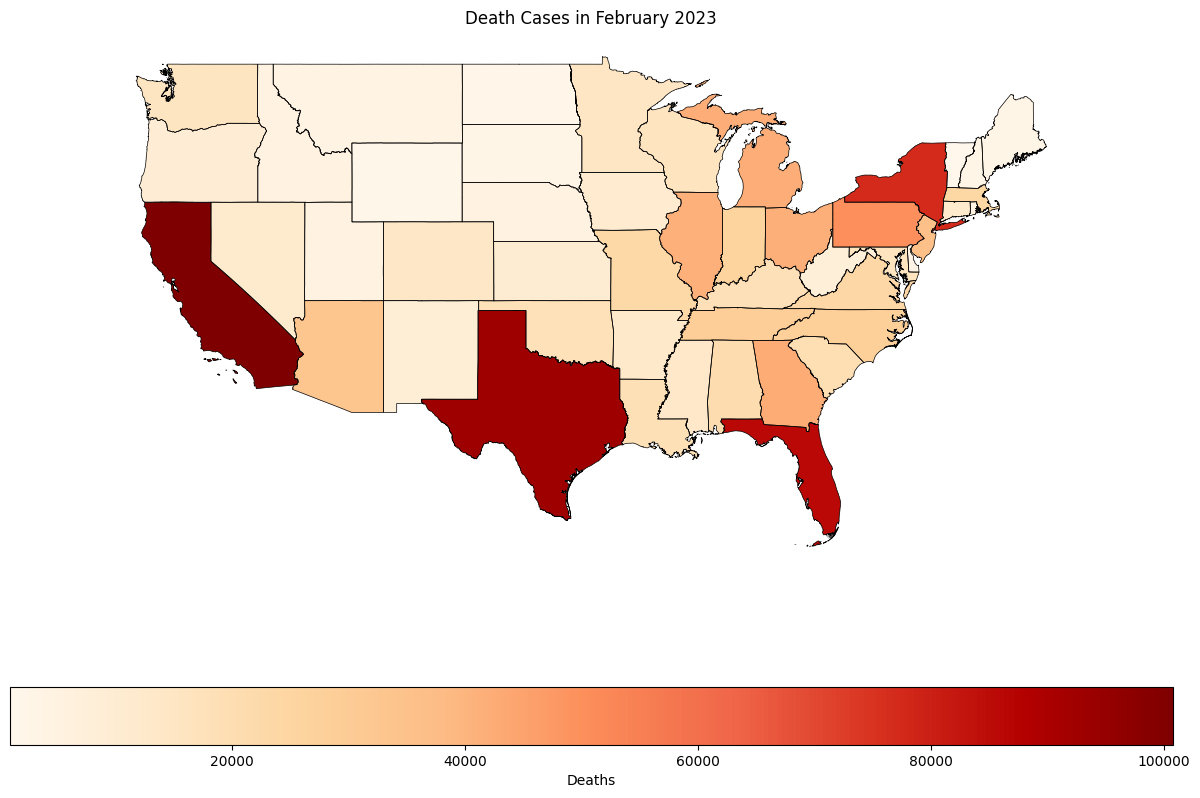

State with the highest death cases: California
State with the lowest death cases: Vermont


In [ ]:
gdf_states.to_crs(epsg=4269, inplace=True)

### YOUR CODE HERE ###
# DataFrame 'death_by_month' contains the dataset for this problem
gdf_death = gdf_states.merge(death_by_month, on='Province_State', how='left') #Merging DataFrame 'death_by_month' with GeoDataFrame 'gdf_states'. The merged GeoDataFrame should be stored in 'gdf_death'
fig, ax = plt.subplots(1, 1, figsize=(15,10))
gdf_death.plot(column='02-2023', cmap='OrRd', legend=True, ax=ax, legend_kwds={"label": "Deaths", "orientation": "horizontal"})
gdf_death.boundary.plot(ax=ax, color='k', linewidth=0.5)
plt.title("Death Cases in February 2023")
plt.axis('off')
plt.show()
print("State with the highest death cases: California")
print("State with the lowest death cases: Vermont")

### Q3b

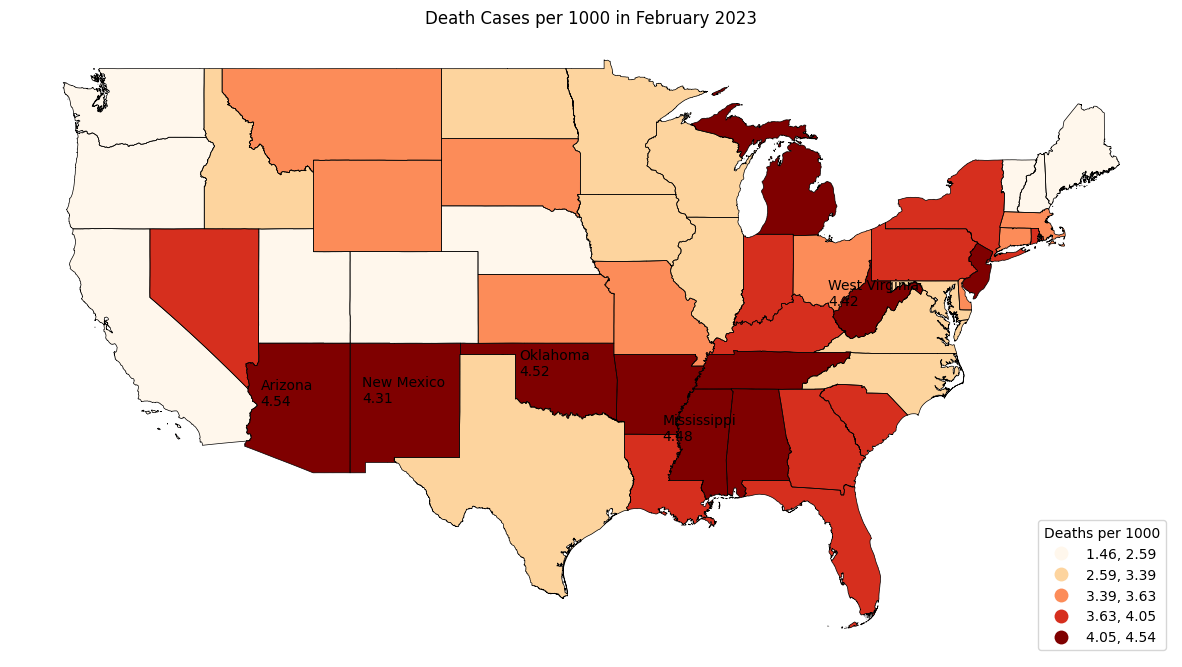

In [29]:
### YOUR CODE HERE ###
gdf_death["Death_per_1000"] = (gdf_death['02-2023'] / gdf_death['Population']) * 1000
fig, ax = plt.subplots(1, 1, figsize=(15,10))
gdf_death.plot(column='Death_per_1000', cmap='OrRd',scheme='quantiles', legend=True, ax=ax, legend_kwds={"title": "Deaths per 1000", "loc": "lower right"})
gdf_death.boundary.plot(ax=ax, color='k', linewidth=0.5)
max_cases_state = gdf_death.nlargest(5, 'Death_per_1000')
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Death_per_1000']):
    label = f'{name}\n{value:.2f}'
    plt.gca().annotate(label, xy=(x, y), xytext=(-30, 0), textcoords="offset points")

plt.title("Death Cases per 1000 in February 2023")
plt.axis('off')
plt.show()

**Your Text Answer**
The chloropleth in 3b highlights the states with highest deaths relative to their population size whereas the graph in 3a shows the total number of deaths per state. The chorpleth in 3b is more suitable since it provides a more accurate representation of the severity of COVID-19 in relation to population size per state.

## Question 4: Choropleth By Time

In [ ]:
### YOUR CODE HERE ###
#calculate new death cases by month
death_by_month_new = death_by_month.copy()  # Create a copy to avoid modifying the original DataFrame
# Calculate the difference between consecutive months for each state
for i in range(3, len(death_by_month_new.columns)):
    death_by_month_new.iloc[:, i] = death_by_month_new.iloc[:, i] - death_by_month_new.iloc[:, i - 1]  # Subtract previous month's value from current month
# Select the columns for January 2021 to December 2021
death_by_month_new = death_by_month_new[['Province_State', 'Population'] + death_by_month_new.columns[12:24].tolist()]

death_by_month_new.columns = ['Province_State', 'Population'] + [f'{i:02d}-2021' for i in range(1, 13)]

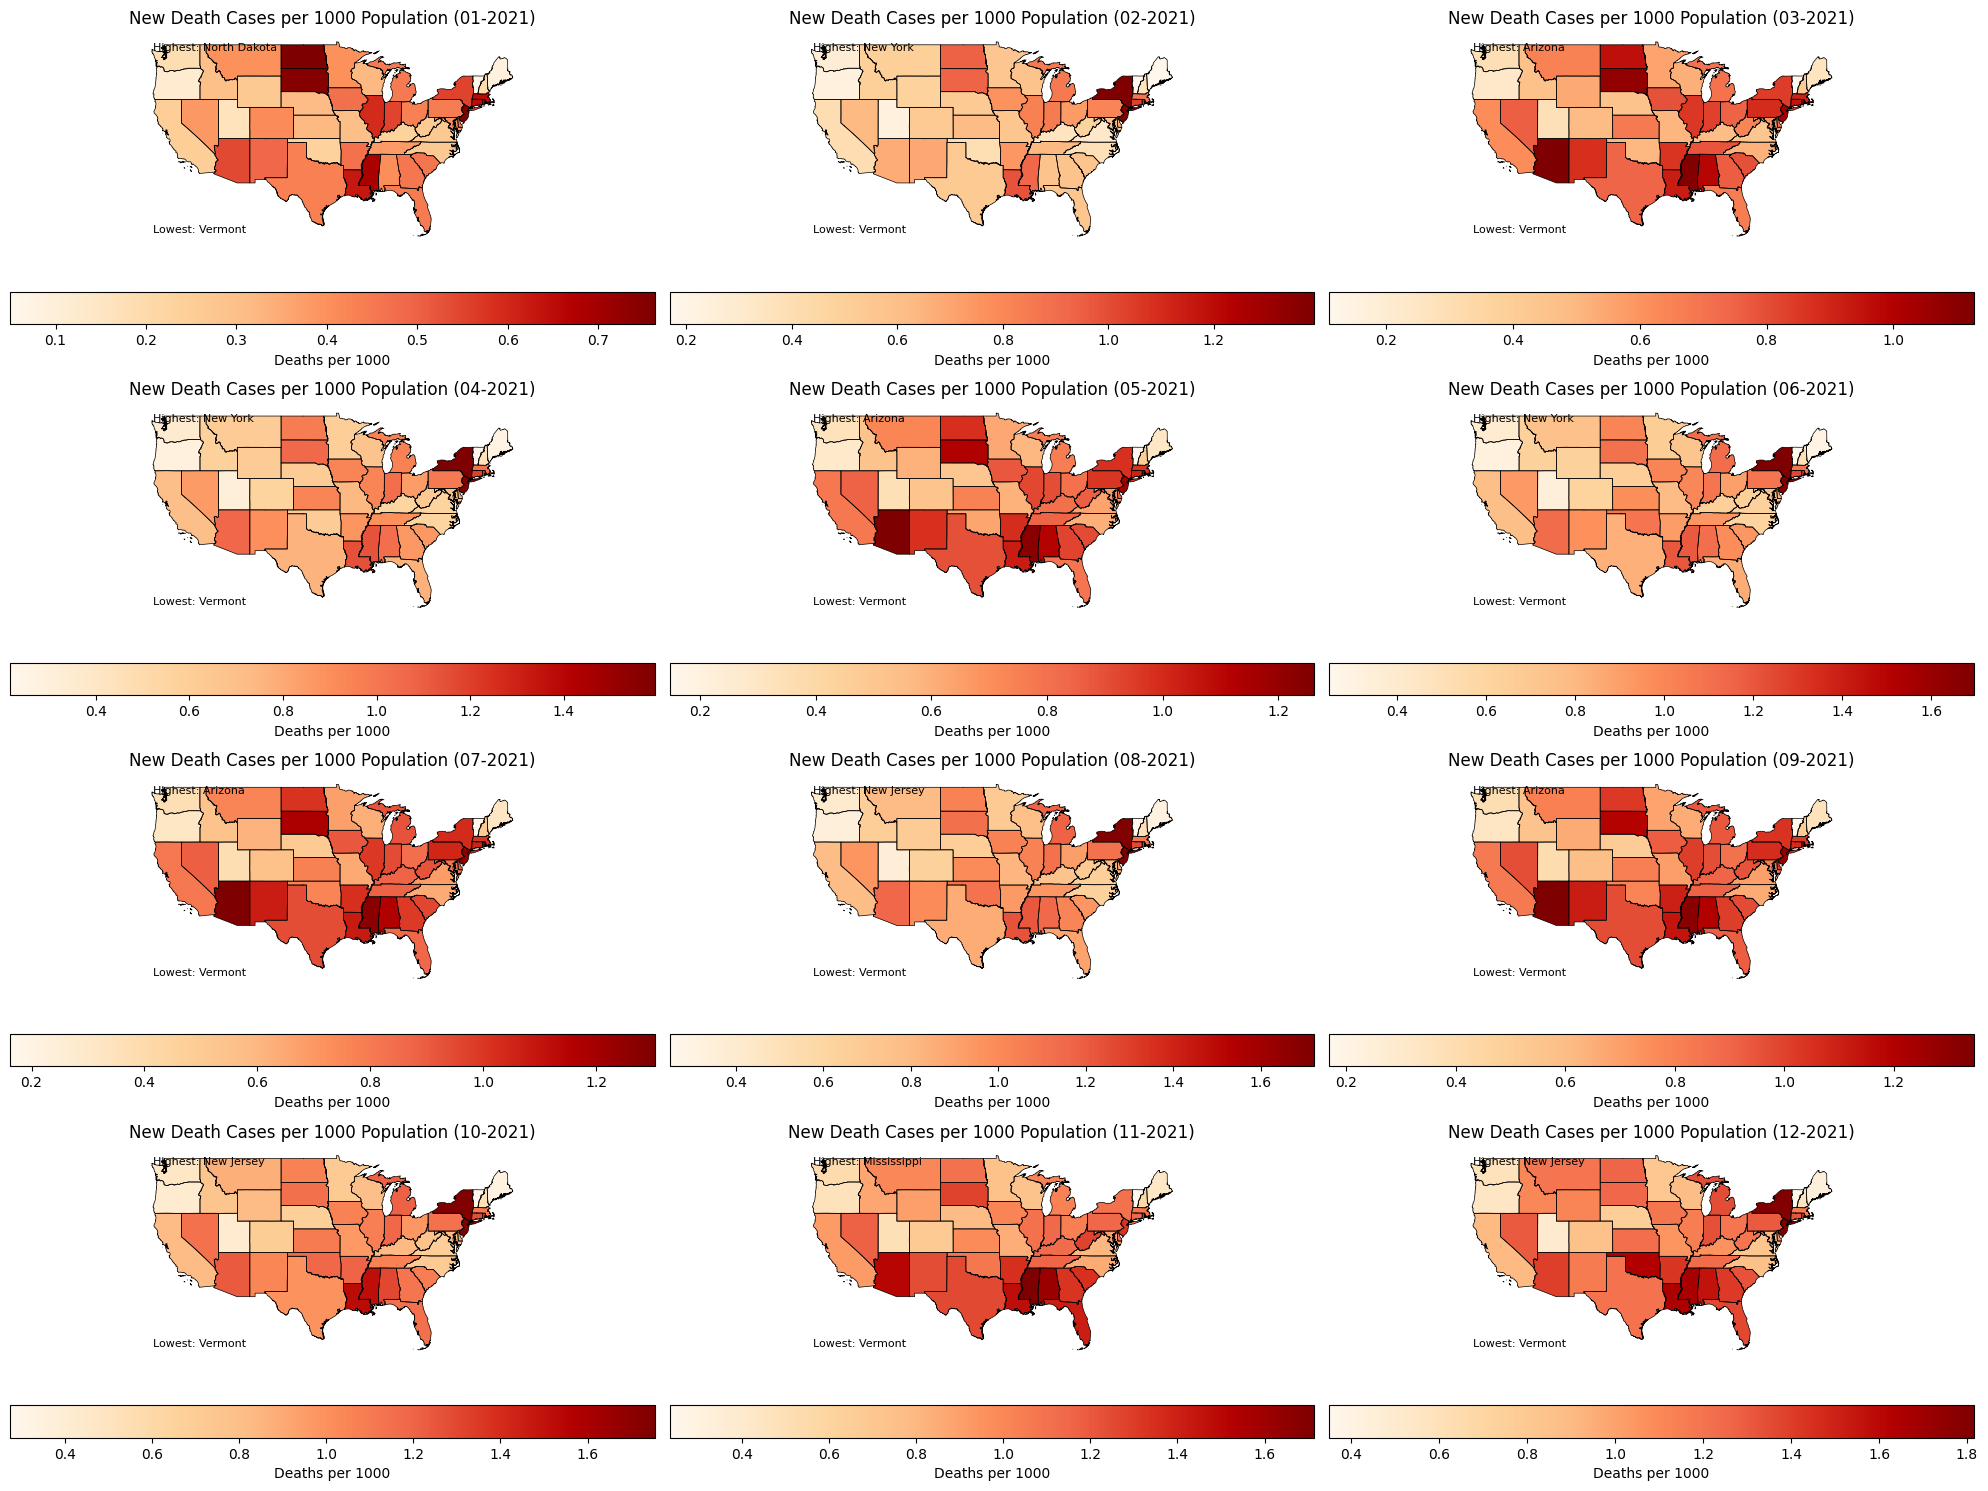

In [ ]:
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()
## YOUR CODE HERE ##
# plot the new death cases per 1000 population from 01-2021 to 12-2021
for i, month in enumerate(death_by_month_new.columns[2:]):  # Start from the third column (index 2)
    # Merge data for the current month with gdf_states
    merged_data = gdf_states.merge(death_by_month_new[['Province_State', 'Population', month]], on='Province_State', how='left')

    # Calculate death cases per 1000 population for the current month
    merged_data['Death_per_1000'] = (merged_data[month] / merged_data['Population']) * 1000
    merged_data.dropna(subset=['Population'], inplace=True) # Drop rows with null values in 'Population' column
    # Create choropleth for the current month
    merged_data.plot(column='Death_per_1000', cmap='OrRd', legend=True, ax=ax[i], legend_kwds={'label': "Deaths per 1000", 'orientation': "horizontal"})
    merged_data.boundary.plot(ax=ax[i], color='k', linewidth=0.5)

    # Label highest and lowest states for the current month
    highest_state = merged_data.loc[merged_data['Death_per_1000'].idxmax(), 'Province_State']
    lowest_state = merged_data.loc[merged_data['Death_per_1000'].idxmin(), 'Province_State']

    ax[i].text(0.05, 0.95, f"Highest: {highest_state}", transform=ax[i].transAxes, fontsize=8, va='top')
    ax[i].text(0.05, 0.05, f"Lowest: {lowest_state}", transform=ax[i].transAxes, fontsize=8, va='bottom')

    ax[i].set_title(f"New Death Cases per 1000 Population ({month})")
    ax[i].axis('off')

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()

**Your Text Answer** Arizona tended to have more death cases in the summer months, such as May, June and September, and less in winter such as February or December. Arizona remains a hotspot, as well as New York.

### Q4b

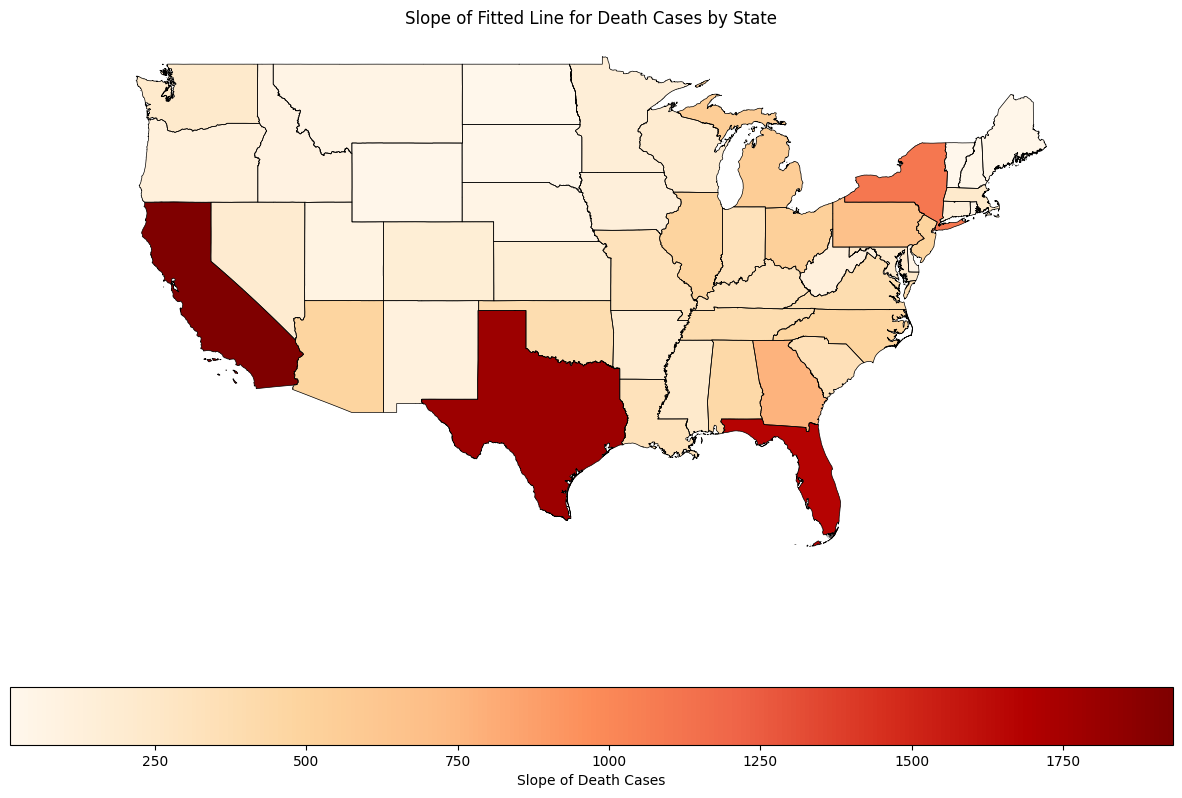

In [ ]:
### YOUR CODE HERE ###
def calculate_slope_intercept(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_xy = sum(x_i * y_i for x_i, y_i in zip(x, y))
    sum_x2 = sum(x_i**2 for x_i in x)

    slope = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x**2)
    intercept = (sum_y - slope * sum_x) / n

    return slope, intercept
# Create an empty list to store the state data and slopes
state_slope_data = []

for state in death_by_month_new['Province_State'].unique():
  state_data = death_by_month_new[death_by_month_new['Province_State'] == state]
  x = list(range(len(state_data.columns[2:])))
  y = list(state_data.iloc[0, 2:].values)
  slope, _ = calculate_slope_intercept(x, y)
  # Append the state and slope as a dictionary to the list
  state_slope_data.append({'Province_State': state, 'Slope': slope})

# Create a DataFrame for slopes
slopes_df = pd.DataFrame(state_slope_data)

# Merge slopes with gdf_states
gdf_slopes = gdf_states.merge(slopes_df, on='Province_State', how='left')

# Create the choropleth
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
gdf_slopes.plot(column='Slope', cmap='OrRd', legend=True, ax=ax, legend_kwds={'label': "Slope of Death Cases", 'orientation': "horizontal"})
gdf_slopes.boundary.plot(ax=ax, color='k', linewidth=0.5)

plt.title('Slope of Fitted Line for Death Cases by State')
plt.axis('off')
plt.show()

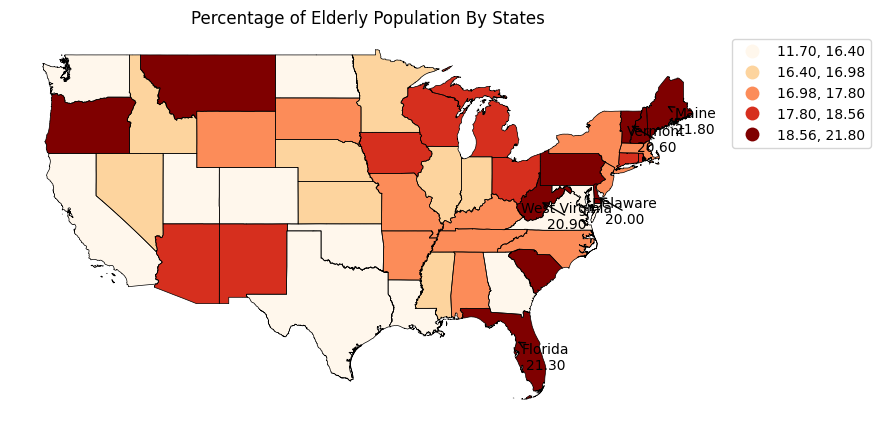

In [ ]:
### DO NOT MODIFY ###
# run the code the plot the precentage of population aged 65+ by states choropleth
elder_population = pd.read_csv('https://raw.githubusercontent.com/MIE223-2024/course-datasets/main/elder_population.csv')[['State','Population Ages 65+ (percent of state population)']]
elder_population.columns = ['Province_State', 'Elderly']
# read the shapefile
gdf_states = gpd.read_file('cb_2018_us_state_500k')
gdf_states = gdf_states.rename(columns={'NAME': 'Province_State'}) # rename the columns
# remove regions that are not in the mainland US
gdf_states = gdf_states[~gdf_states['Province_State'].isin(['Diamond Princess', 'Grand Princess',
                                                            'American Samoa', 'Guam',
                                                            'United States Virgin Islands', 'Puerto Rico',
                                                            'Alaska', 'Hawaii',
                                                            'Commonwealth of the Northern Mariana Islands'])]
gdf_elder = gdf_states.merge(elder_population)
gdf_elder.plot(column='Elderly', cmap='OrRd', legend=True, figsize=(10, 5), scheme='quantiles',
               legend_kwds={"bbox_to_anchor": (1, 1),'loc': 'upper left'})
gdf_elder.boundary.plot(figsize=(10, 5),ax = plt.gca(), color='k', linewidth=0.5)
# label the top 5 states with precentage of elderly population
max_cases_state = gdf_elder.nlargest(5, 'Elderly') # get the top 5 states
for x, y, name, value in zip(max_cases_state.geometry.centroid.x,
                            max_cases_state.geometry.centroid.y,
                            max_cases_state['Province_State'],
                            max_cases_state['Elderly']):
    plt.annotate(f'{name}\n{value:.2f}', xy=(x, y), xytext=(20, -20),
                   textcoords="offset points", ha='center', arrowprops=dict(arrowstyle='->'))

plt.title('Percentage of Elderly Population By States')
plt.axis('off')
plt.show()


**Your Text Answer** A supporting state could be Florida since the ratio of elderly people to the amount of death cases is similar. A contradicting state would California because it has a high amount of death cases but a lower percentage ofelderly population.